In [1]:
from PIL import Image
import torch

from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim

In [2]:
transform = transforms.ToTensor()

dataset = datasets.ImageFolder("../data/train", transform=transform)
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)

valid_set = datasets.ImageFolder("../data/valid/", transform=transform)

In [4]:
mean = 0.
std = 0.
total = 0.

for images, _ in loader:
    batch_samples = images.size(0)  # batch size
    images = images.view(batch_samples, images.size(1), -1)  # flatten H*W
    
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total += batch_samples

mean /= total
std /= total

print("Mean:", mean)
print("Std:", std)

Mean: tensor([0.4757, 0.5001, 0.4264])
Std: tensor([0.1847, 0.1592, 0.2024])


In [3]:
mean = torch.tensor([0.4757, 0.5001, 0.4264])
std = torch.tensor([0.1847, 0.1592, 0.2024])

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

train_ds = datasets.ImageFolder("../data/train", transform=transform)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

valid_set = datasets.ImageFolder("../data/valid/", transform=transform)
valid_loader = DataLoader(valid_set, batch_size=32, shuffle=False)

In [5]:
class LeafClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)

        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 38)
    def forward(self, x):
      x = torch.relu(self.conv1(x))
      x = torch.max_pool2d(x, 2)
      x = torch.relu(self.conv2(x))
      x = torch.max_pool2d(x, 2)

      x = x.view(x.size(0), -1)

      x = torch.relu(self.fc1(x))
      x = self.fc2(x)
      return x
    
net = LeafClassifier()


net.load_state_dict(torch.load("model_state.pth"))
net.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)


#dummy_data = torch.randn(1, 3, 224, 224)
#output = net(dummy_data)

LeafClassifier(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=200704, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=38, bias=True)
)

In [ ]:
num_epochs = 1
net.to(device)
net.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

total = 0
correct = 0

for epoch in range(num_epochs):
    for i, (images, labels) in (enumerate(train_loader, 0)):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print()
    torch.save(net.state_dict(), "model_state.pth")
    print(f"Epoch {epoch+1} loss: {loss.item()}, accuracy: {100 * correct / total:.2f}%")


Exception ignored in: <function tqdm.__del__ at 0x00000246523136A0>
Traceback (most recent call last):
  File "c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\notebook.py", line 282, in close
    self.disp(bar_style='success', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.8457363..2.721315].


tensor(37)


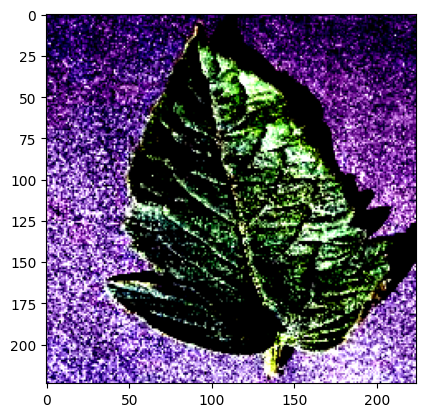

In [16]:
import matplotlib.pyplot as plt
print(labels[0].cpu())
plt.imshow(images[0].cpu().permute(1,2,0))

In [29]:
out=net(images[1:2])
torch.argmax(out)

tensor(36, device='cuda:0')

In [ ]:


net.eval()
total = 0
correct = 0
with torch.no_grad():
    for i, (images, labels) in enumerate(valid_loader, 0):
        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i == 0:
            print(predicted[0],labels[0])
            plt.imshow(images[0].cpu().permute(1,2,0))

print(f"Accuracy of the network on the {total} test images: {100 * correct / total :.2f}%")


Accuracy of the network on the 10000 test images: 82.89893011609378%


In [19]:
print(f"Accuracy of the network on the {total} test images: {(100 * correct / total):.2f}%")


Accuracy of the network on the 17572 test images: 82.90%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.8703692..2.573517].


tensor(37, device='cuda:0') tensor(37, device='cuda:0')


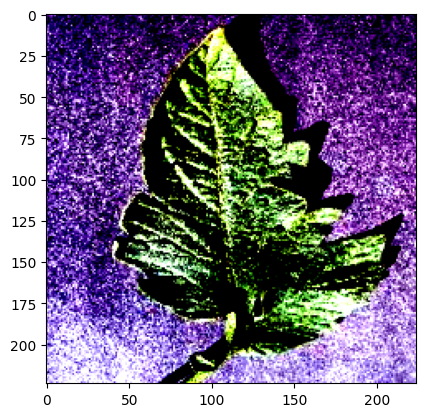

In [18]:
print(predicted[-1],labels[-1])
plt.imshow(images[-1].cpu().permute(1,2,0))

In [39]:

!pip install ipywidgets --upgrade --user



^C


  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.8-py3-none-any.whl (139 kB)
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   -------------

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\pc\\AppData\\Local\\Temp\\pip-unpack-qmv3k6wx\\jupyterlab_widgets-3.0.16-py3-none-any.whl'
Check the permissions.


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

from tqdm.notebook import tqdm

ModuleNotFoundError: No module named 'ipywidgets'

In [8]:
print(len(train_loader))

2197
